<a href="https://colab.research.google.com/github/DonaldTurton/iLab2/blob/master/Modelling_3%20weeks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ILab2

# Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns

# Data Set BITFINIX EXCHANGE - DAILY

## Bitcoin

In [44]:
BITC_BITFINIX_url = "https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Bitcoin/BITFINEX_BTCUSD%2C%201D.csv"

bitcoin_daily = pd.read_csv (BITC_BITFINIX_url)

### Ethereum

In [45]:
ETHERIUM_BITFINIX_url= 'https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Ethereum/BITFINEX_ETHUSD%2C%201D.csv'

In [46]:
ethereum_daily = pd.read_csv(ETHERIUM_BITFINIX_url) 

### Ripple 

In [47]:
RIPPLE_BITFINIX_url= 'https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Ripple/BITFINEX_XRPUSD%2C%201D.csv'

In [48]:
ripple_daily = pd.read_csv(RIPPLE_BITFINIX_url)

## Subset DF

## Subset DF

In [49]:
bit_bit = bitcoin_daily[['time','open', 'close', 'Volume']]
bit_bit = bit_bit.rename(columns={'open': 'BTC_open', 'close': 'BTC_close', 'Volume': 'BTC_vol'})

In [50]:
eth_bit = ethereum_daily[['time','open', 'close', 'Volume']]
eth_bit = eth_bit.rename(columns={'open': 'ETHER_open', 'close': 'ETHER_close', 'Volume': 'ETHER_vol'})

In [51]:
xrp_bit = ripple_daily[['time','open', 'close', 'Volume']]
xrp_bit = xrp_bit.rename(columns={'open': 'XRP_open', 'close': 'XRP_close', 'Volume': 'XRP_vol'})

## Merge



In [52]:
# Data frames for each coin from BITFINEX
#bit_bit 2,677 observations
#eth_bit 1,497 observations
#xrp_bit 1,176 observations

In [53]:
bit_eth = pd.merge(bit_bit, eth_bit, how='left', on=['time'])
data = pd.merge(bit_eth, xrp_bit, how='left', on=['time'])

In [54]:
#Drop NA 
data = data.dropna()
len(data) #1,174 observations after removing NA

1174

# Lag the predictor variables 21 days

In [55]:
# Duplicate the bitcoin variables before lagging
data['BTC_open_dup'] = data['BTC_open'] 
data['BTC_close_dup'] = data['BTC_close']
data['BTC_vol_dup'] = data['BTC_vol']

In [56]:
# Remove the BTC open and BTC vol variables before lagging as they  can't be used for this type of modelling strategy. 
data = data.drop(['BTC_open', 'BTC_vol'], axis = 1)

In [57]:
# Lag all variables except BTC_close

data['ETHER_open'] = data['ETHER_open'].shift(21)
data['ETHER_close'] = data['ETHER_close'].shift(21)
data['ETHER_vol'] = data['ETHER_vol'].shift(21)

data['XRP_open'] = data['XRP_open'].shift(21)
data['XRP_close'] = data['XRP_close'].shift(21)
data['XRP_vol'] = data['XRP_vol'].shift(21)

data['BTC_open_dup'] = data['BTC_open_dup'].shift(21)
data['BTC_close_dup'] = data['BTC_close_dup'].shift(21)
data['BTC_vol_dup'] = data['BTC_vol_dup'].shift(21)

In [58]:
# Drop the first 7 rows of the data set as these are NA rows due to the lagging. 
data.drop(data.head(21).index, inplace=True)

# Set the test and train sets

In [63]:
# Set the  data index as a data col
data.index = range(1,1154)

In [202]:
# May train and test sets
pd.set_option("display.max_rows", None, "display.max_columns", None)
train_may = data[1:1071]
test_may = data[1071:1092]

In [203]:
# July train and test sets
train_july = data[1:1132]
test_july = data[1132:1153]

# Donald Modelling

In [119]:
# DATA FRAME WITH DATES AS INDEX FOR PLOTS IN X AXIS
data2 = data

# Convert Date column to Date format.  
data2["time"] = pd.to_datetime(data2["time"], dayfirst=True )  #, format ='%d/%m/%y', errors='ignore'

#Set Date as Index
data2 = data2.set_index('time')#.asfreq('d')

In [120]:
#COPY FOR DATA2
# May train and test sets
pd.set_option("display.max_rows", None, "display.max_columns", None)
train_may = data2[1:1071]
test_may = data2[1071:1092]

## MAY Pred

In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [122]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for MAY
x_train_may = train_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_may = train_may['BTC_close']
# Setup testing x and y variables
x_test_may = test_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_may = test_may['BTC_close']

In [123]:
# Random Forest tunning 
RandomForestRegression = RandomForestRegressor(n_estimators=500)

In [124]:

RandomForestRegression.fit(x_train_may, y_train_may)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [125]:
y_prediction = RandomForestRegression.predict(x_test_may)
y_prediction

array([9026.23819623, 9047.11068285, 8183.54203354, 7709.68975791,
       7707.80815509, 8855.1394655 , 8417.07150291, 7194.29018678,
       7278.31458404, 7169.63754064, 7089.83470987, 7184.21533095,
       7328.95195646, 8965.85296098, 9209.84819788, 8357.26000981,
       9030.96163451, 8409.54210294, 8362.26233902, 8133.05971571,
       9184.63311381])

In [126]:
rf_mse = mean_squared_error(y_test_may, y_prediction)
rf_mse

rf_rmse = np.sqrt(rf_mse)
rf_rmse

1393.3136056913784

In [127]:
y_test_may = pd.DataFrame(y_test_may)
#y_test_may['index'] = range(1,8)
y_test_may

,BTC_close
time,
2020-05-15 00:00:00+00:00,9311.200000
2020-05-16 00:00:00+00:00,9387.952090
2020-05-17 00:00:00+00:00,9668.200000
2020-05-18 00:00:00+00:00,9714.825163
2020-05-19 00:00:00+00:00,9769.400000
2020-05-20 00:00:00+00:00,9502.000000
2020-05-21 00:00:00+00:00,9057.100000
2020-05-22 00:00:00+00:00,9162.400000
2020-05-23 00:00:00+00:00,9175.600000


In [128]:
y_prediction = pd.DataFrame(y_prediction)
y_prediction.index=y_test_may.index
y_prediction.columns=['Prediction']
#y_prediction['index'] = range(1,8)
y_prediction

,Prediction
time,
2020-05-15 00:00:00+00:00,9026.238196
2020-05-16 00:00:00+00:00,9047.110683
2020-05-17 00:00:00+00:00,8183.542034
2020-05-18 00:00:00+00:00,7709.689758
2020-05-19 00:00:00+00:00,7707.808155
2020-05-20 00:00:00+00:00,8855.139465
2020-05-21 00:00:00+00:00,8417.071503
2020-05-22 00:00:00+00:00,7194.290187
2020-05-23 00:00:00+00:00,7278.314584


In [129]:
#Merge predicted vs actual 
#PredictionVSactual = y_test_may.merge(y_prediction, on=None, how='left')

PredictionVSactual = y_test_may.join(y_prediction)


#PredictionVSactual = PredictionVSactual.set_index('time')
#PredictionVSactual.columns=['Prediction','Index' ,'Real']

#PredictionVSactual = PredictionVSactual[['Prediction', 'Real']]

PredictionVSactual

,BTC_close,Prediction
time,,
2020-05-15 00:00:00+00:00,9311.200000,9026.238196
2020-05-16 00:00:00+00:00,9387.952090,9047.110683
2020-05-17 00:00:00+00:00,9668.200000,8183.542034
2020-05-18 00:00:00+00:00,9714.825163,7709.689758
2020-05-19 00:00:00+00:00,9769.400000,7707.808155
2020-05-20 00:00:00+00:00,9502.000000,8855.139465
2020-05-21 00:00:00+00:00,9057.100000,8417.071503
2020-05-22 00:00:00+00:00,9162.400000,7194.290187
2020-05-23 00:00:00+00:00,9175.600000,7278.314584


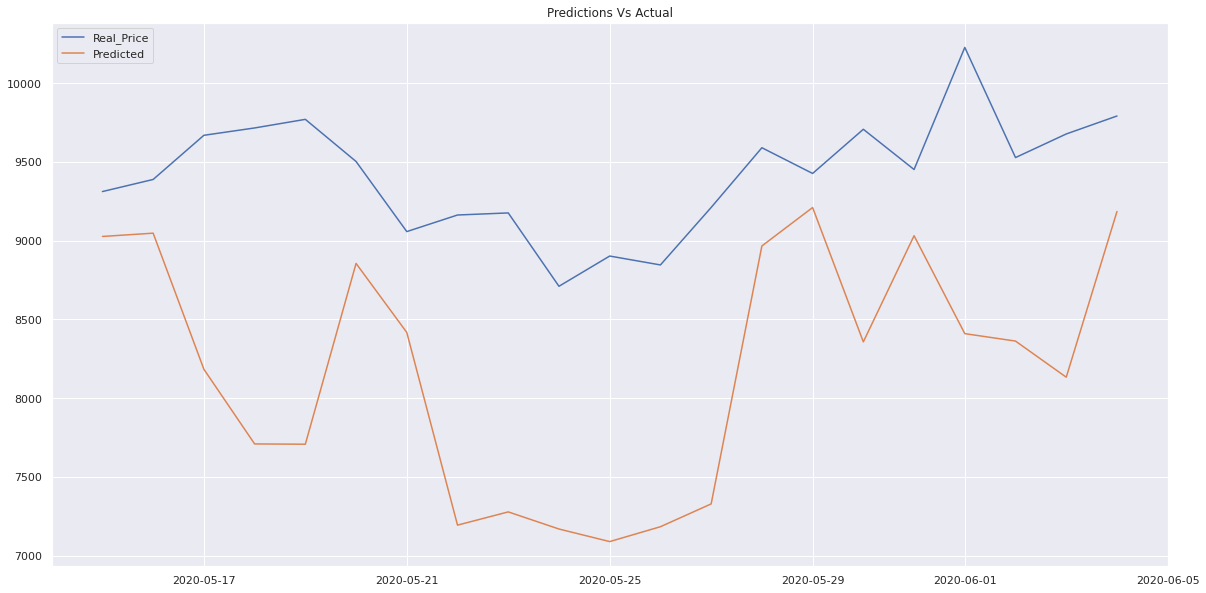

In [130]:
import matplotlib.pyplot as plt

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 10)})

# plot
plt.plot(PredictionVSactual)
plt.title("Predictions Vs Actual")
plt.legend(['Real_Price','Predicted'],loc='upper left')
plt.show()

## July

In [166]:
#COPY 
# July train and test sets
train_july = data2[1:1132]
test_july = data2[1132:1153]

In [167]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for MAY
x_train_july = train_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_july = train_july['BTC_close']
# Setup testing x and y variables
x_test_july = test_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_july = test_july['BTC_close']

In [168]:
RandomForestRegression.fit(x_train_july, y_train_july)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [169]:
y_prediction_july = RandomForestRegression.predict(x_test_july)
y_prediction_july

array([9143.88835559, 8907.46597547, 8783.67597317, 8658.14497072,
       8686.2261248 , 8746.58313221, 8721.90400751, 8795.01537498,
       8722.17892169, 8664.88328293, 8683.82445374, 8694.08463724,
       9067.24496315, 8925.14508309, 8937.62608039, 8461.21527548,
       9021.92022242, 8806.2041674 , 9024.39557598, 8811.55994106,
       8806.19450018])

In [170]:
rf_mse = mean_squared_error(y_test_july, y_prediction_july)
rf_mse

rf_rmse = np.sqrt(rf_mse)
rf_rmse

1637.1993529510305

In [171]:
y_test_july = pd.DataFrame(y_test_july)
#y_test_may['index'] = range(1,8)
y_test_july

,BTC_close
time,
2020-07-15 00:00:00+00:00,9210.100000
2020-07-16 00:00:00+00:00,9149.600000
2020-07-17 00:00:00+00:00,9167.328612
2020-07-18 00:00:00+00:00,9189.100000
2020-07-19 00:00:00+00:00,9231.200000
2020-07-20 00:00:00+00:00,9179.200000
2020-07-21 00:00:00+00:00,9402.000000
2020-07-22 00:00:00+00:00,9557.700000
2020-07-23 00:00:00+00:00,9615.000000


In [172]:
y_prediction_july = pd.DataFrame(y_prediction_july)
y_prediction_july.index=y_test_july.index
y_prediction_july.columns=['Prediction']
#y_prediction['index'] = range(1,8)
y_prediction_july

,Prediction
time,
2020-07-15 00:00:00+00:00,9143.888356
2020-07-16 00:00:00+00:00,8907.465975
2020-07-17 00:00:00+00:00,8783.675973
2020-07-18 00:00:00+00:00,8658.144971
2020-07-19 00:00:00+00:00,8686.226125
2020-07-20 00:00:00+00:00,8746.583132
2020-07-21 00:00:00+00:00,8721.904008
2020-07-22 00:00:00+00:00,8795.015375
2020-07-23 00:00:00+00:00,8722.178922


In [173]:
#Merge predicted vs actual 
#PredictionVSactual = y_test_may.merge(y_prediction, on=None, how='left')

PredictionVSactual_july = y_test_july.join(y_prediction_july)


#PredictionVSactual = PredictionVSactual.set_index('time')
#PredictionVSactual.columns=['Prediction','Index' ,'Real']

#PredictionVSactual = PredictionVSactual[['Prediction', 'Real']]

PredictionVSactual_july

,BTC_close,Prediction
time,,
2020-07-15 00:00:00+00:00,9210.100000,9143.888356
2020-07-16 00:00:00+00:00,9149.600000,8907.465975
2020-07-17 00:00:00+00:00,9167.328612,8783.675973
2020-07-18 00:00:00+00:00,9189.100000,8658.144971
2020-07-19 00:00:00+00:00,9231.200000,8686.226125
2020-07-20 00:00:00+00:00,9179.200000,8746.583132
2020-07-21 00:00:00+00:00,9402.000000,8721.904008
2020-07-22 00:00:00+00:00,9557.700000,8795.015375
2020-07-23 00:00:00+00:00,9615.000000,8722.178922


In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 10)})

# plot
plt.plot(PredictionVSactual_july)
plt.title("Predictions Vs Actual")
plt.legend(['Real_Price','Predicted'],loc='upper left')
plt.show()

# **Rob Modelling**

#  Set test and train sets


In [204]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for MAY
x_train_may = train_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_may = train_may['BTC_close']

# Setup testing x and y variables
x_test_may = test_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_may = test_may['BTC_close']


In [205]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for JULY
x_train_july = train_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_july = train_july['BTC_close']

# Setup testing x and y variables
x_test_july = test_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_july = test_july['BTC_close']


# Linear Model - May

In [68]:
# Import the requried packages for the linear regression model
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [69]:
# Runt he linear regressor over the x and y training data
model = LinearRegression().fit(x_train_may, y_train_may)

In [70]:
# Runt he linear regressor over the x and y training data
from statsmodels.api import OLS
OLS(y_train_may,x_train_may).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              BTC_close   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              2491.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):                        0.00
Time:                        07:57:04   Log-Likelihood:                         -9455.7
No. Observations:                1070   AIC:                                  1.893e+04
Df Residuals:                    1061   BIC:                                  1.897e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ETHER_open       -0.8379      2.871     -0.292      0.770      -6.471       4.795
ETHER_close       1.3796      2.881      0.479      0.632      -4.273       7.033
ETHER_vol         0.0006      0.000      1.799      0.072   -5.68e-05       0.001
XRP_open      -1862.4221   1262.795     -1.475      0.141   -4340.282     615.438
XRP_close      -810.7177   1285.304     -0.631      0.528   -3332.745    1711.310
XRP_vol       -2.068e-06   1.11e-06     -1.862      0.063   -4.25e-06    1.12e-07
BTC_open_dup      0.0196      0.167      0.117      0.907      -0.308       0.347
BTC_close_dup     1.0253      0.166      6.182      0.000       0.700       1.351
BTC_vol_dup       0.0204      0.003      6.281      0.000       0.014       0.027
==============================================================================
Omnibus:                      209.110   Durbin-Watson:                   0.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              981.951
Skew:                           0.829   Prob(JB):                    5.92e-214
Kurtosis:                       7.391   Cond. No.                     2.65e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
# Predict the model on the x_test data
y_pred_may = pd.DataFrame(model.predict(x_test_may))
y_pred_may['index'] = range(1,22)

In [72]:
y_pred_may

,0,index
0,7915.199326,1
1,7785.747884,2
2,7936.176934,3
3,8005.129469,4
4,8044.773725,5
5,9218.092417,6
6,9040.268460,7
7,8925.070359,8
8,9038.677318,9
9,8975.358669,10


In [84]:
y_test_may = pd.DataFrame(y_test_may)[0:21]
y_test_may['index'] = range(1,22)

In [86]:
# merge the prediction and actual data frames
merge_may = y_pred_may.merge(y_test_may, on='index', how='left')

In [87]:
merge_may.columns = ['lm_prediction', 'index', 'real']

In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
MSE = mean_squared_error(y_true = merge_may.real, y_pred = merge_may.lm_prediction)
np.sqrt(MSE)

895.7261139614532

In [90]:
# Calculate the r_square value for the linear model
r_sq = model.score(x_train_may, y_train_may)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.705601468642838


In [91]:
merge_may

,lm_prediction,index,real
0,7915.199326,1,9311.200000
1,7785.747884,2,9387.952090
2,7936.176934,3,9668.200000
3,8005.129469,4,9714.825163
4,8044.773725,5,9769.400000
5,9218.092417,6,9502.000000
6,9040.268460,7,9057.100000
7,8925.070359,8,9162.400000
8,9038.677318,9,9175.600000
9,8975.358669,10,8710.100000


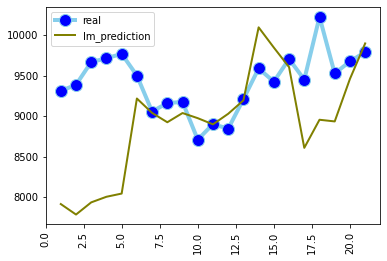

In [92]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_may, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Lasso Regression - May

In [93]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

lasso = Lasso()

In [94]:
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

In [95]:
lasso_regressor = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)#GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv=5)

In [96]:
lasso = lasso_regressor.fit(x_train_may, y_train_may)

In [97]:
# Predict the model on the x_test data
y_pred_may_lasso = pd.DataFrame(lasso.predict(x_test_may))
y_pred_may_lasso['index'] = range(1,22)

In [98]:
y_pred_may_lasso

,0,index
0,7882.758720,1
1,7754.498239,2
2,7926.922691,3
3,8011.297392,4
4,8032.174359,5
5,9188.209712,6
6,9025.828837,7
7,8908.260383,8
8,9029.669896,9
9,8975.357478,10


In [99]:
# merge the prediction and actual data frames
merge_may = merge_may.merge(y_pred_may_lasso, on='index', how='left')

In [100]:
merge_may

,lm_prediction,index,real,0
0,7915.199326,1,9311.200000,7882.758720
1,7785.747884,2,9387.952090,7754.498239
2,7936.176934,3,9668.200000,7926.922691
3,8005.129469,4,9714.825163,8011.297392
4,8044.773725,5,9769.400000,8032.174359
5,9218.092417,6,9502.000000,9188.209712
6,9040.268460,7,9057.100000,9025.828837
7,8925.070359,8,9162.400000,8908.260383
8,9038.677318,9,9175.600000,9029.669896
9,8975.358669,10,8710.100000,8975.357478


In [101]:
merge_may.columns = ['lm_prediction', 'index', 'real', 'lasso_prediction']

In [102]:
MSE = mean_squared_error(y_true = merge_may.real, y_pred = merge_may.lasso_prediction)
np.sqrt(MSE)

901.713108331651

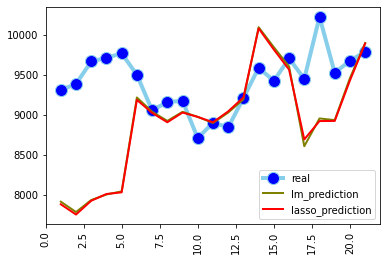

In [103]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_may, marker='', color='olive', linewidth=2)
plt.plot( 'index', 'lasso_prediction', data=merge_may, marker='', color='red', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Support Vector Regression - May

In [104]:
# Import the algorithm package
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [105]:
y_train_may = pd.DataFrame(y_train_may)

In [107]:
#3 Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_train_may)
y = sc_y.fit_transform(y_train_may)

In [108]:
y = y[:, 0]

In [109]:
# Load the SVR and fit
#svr = SVR(kernel='poly')
svr_regressor = SVR(kernel = 'poly')
SVR_reg = svr_regressor.fit(X, y)

In [110]:
# Predict the model on the x_test data
x_test_may = sc_X.fit_transform(x_test_may)

y_pred_may_svr = SVR_reg.predict(x_test_may)
y_pred_may_svr = sc_y.inverse_transform(y_pred_may_svr) 


y_pred_may_svr = pd.DataFrame(y_pred_may_svr)
y_pred_may_svr['index'] = range(1,22)
y_pred_may_svr

,0,index
0,5178.246082,1
1,5357.504130,2
2,5070.394057,3
3,5668.264316,4
4,5433.807088,5
5,5563.693936,6
6,6038.807023,7
7,6931.545999,8
8,7134.556741,9
9,6670.621570,10


In [111]:
# merge the prediction and actual data frames
merge_may = merge_may.merge(y_pred_may_svr, on='index', how='left')

In [112]:
merge_may.columns = ['lm_prediction', 'index', 'real', 'lasso_prediction', 'svr_prediction']

In [ ]:
# Merge Donald's RF prediction into the same plot
PredictionVSactual.columns = ['real', 'random_forest']

merge_may = merge_may.merge(PredictionVSactual, on='real', how='left')
merge_may

In [ ]:
merge_may['Avg'] = (merge_may['lm_prediction'] + merge_may['random_forest']) / 2

merge_may

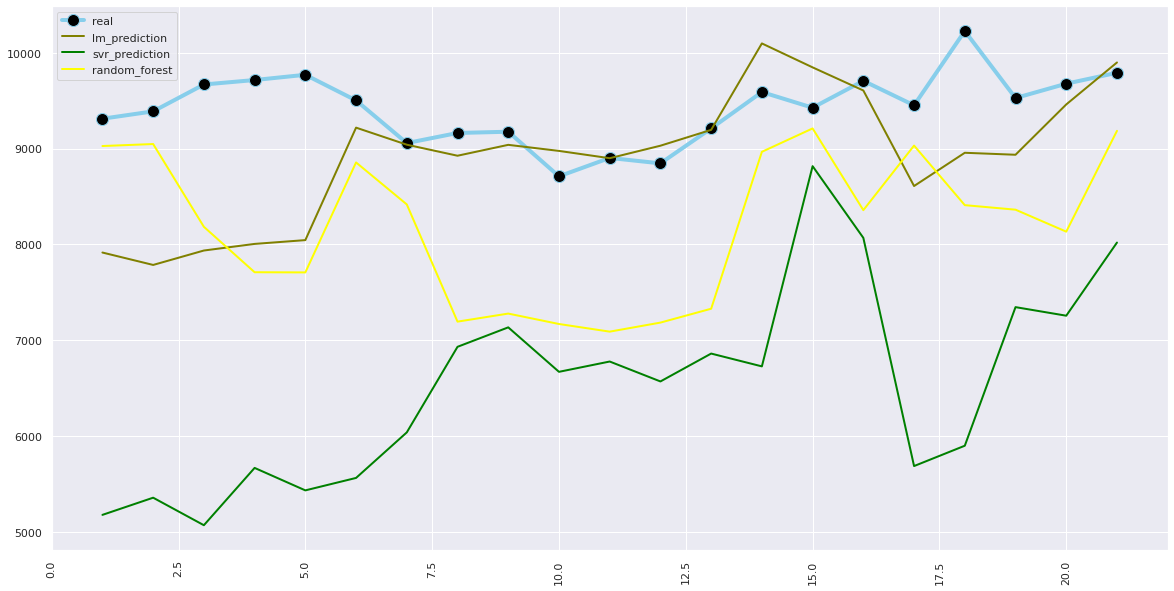

In [135]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_may, marker='o', markerfacecolor='black', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_may, marker='', color='olive', linewidth=2)
#plt.plot( 'index', 'lasso_prediction', data=merge_may, marker='', color='red', linewidth=2)
plt.plot( 'index', 'svr_prediction', data=merge_may, marker='', color='green', linewidth=2)
plt.plot( 'index', 'random_forest', data=merge_may, marker='', color='yellow', linewidth=2)
#plt.plot( 'index', 'Avg', data=merge_may, marker='', color='green', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Linear Model - July

In [136]:
# Runt he linear regressor over the x and y training data
model = LinearRegression().fit(x_train_july, y_train_july)

In [137]:
# Runt he linear regressor over the x and y training data
from statsmodels.api import OLS
OLS(y_train_july,x_train_july).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              BTC_close   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              2832.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):                        0.00
Time:                        08:18:42   Log-Likelihood:                         -9968.8
No. Observations:                1131   AIC:                                  1.996e+04
Df Residuals:                    1122   BIC:                                  2.000e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ETHER_open       -0.8614      2.800     -0.308      0.758      -6.354       4.632
ETHER_close       1.3751      2.809      0.489      0.625      -4.137       6.887
ETHER_vol         0.0006      0.000      1.832      0.067   -4.39e-05       0.001
XRP_open      -1882.5396   1232.462     -1.527      0.127   -4300.728     535.649
XRP_close      -760.7190   1254.559     -0.606      0.544   -3222.266    1700.828
XRP_vol       -2.068e-06   1.08e-06     -1.908      0.057   -4.19e-06    5.84e-08
BTC_open_dup      0.0266      0.160      0.166      0.868      -0.287       0.341
BTC_close_dup     1.0168      0.159      6.396      0.000       0.705       1.329
BTC_vol_dup       0.0206      0.003      6.527      0.000       0.014       0.027
==============================================================================
Omnibus:                      234.664   Durbin-Watson:                   0.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1180.063
Skew:                           0.867   Prob(JB):                    5.66e-257
Kurtosis:                       7.694   Cond. No.                     2.65e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
# Predict the model on the x_test data
y_pred_july = pd.DataFrame(model.predict(x_test_july))
y_pred_july['index'] = range(1,22)

In [139]:
y_test_july = pd.DataFrame(y_test_july)[0:21]
y_test_july['index'] = range(1,22)

In [140]:
# merge the prediction and actual data frames
merge_july = y_pred_july.merge(y_test_july, on='index', how='left')

In [141]:
merge_july.columns = ['lm_prediction', 'index', 'real']

In [142]:
MSE = mean_squared_error(y_true = merge_july.real, y_pred = merge_july.lm_prediction)
np.sqrt(MSE)

1258.4581293329245

In [143]:
# Calculate the r_square value for the linear model
r_sq = model.score(x_train_july, y_train_july)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7115790911175472


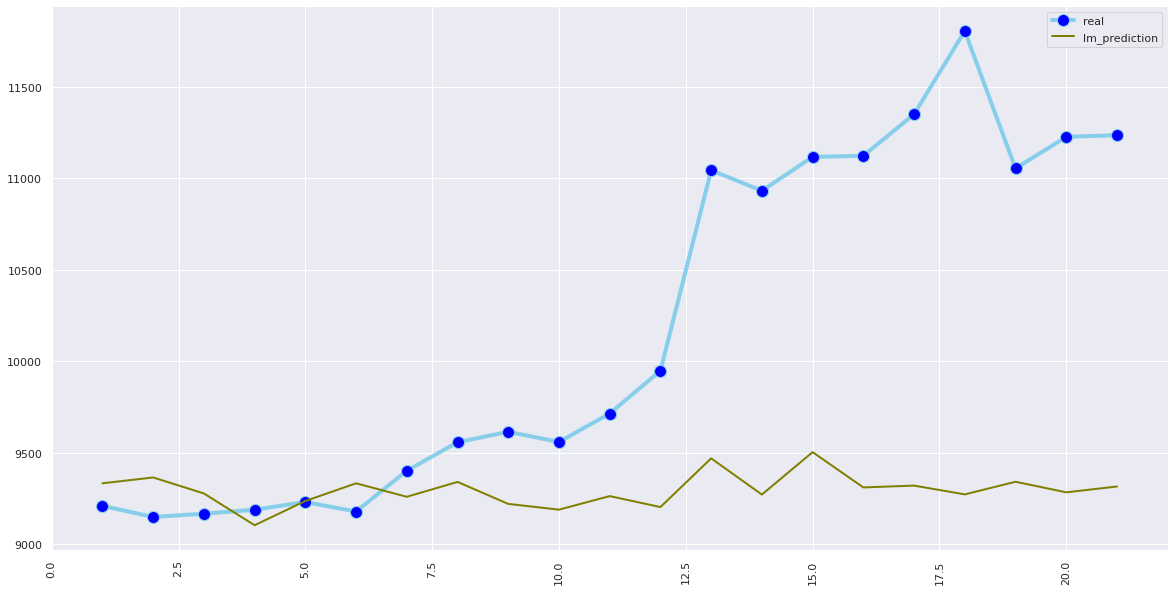

In [144]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_july, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Lasso Regression - July

In [145]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

In [146]:
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

In [147]:
lasso_regressor = GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv=5)

In [ ]:
lasso = lasso_regressor.fit(x_train_july, y_train_july)

In [ ]:
print(lasso.best_params_)

{'alpha': 1e-15}


In [ ]:
print(lasso.best_score_)

-997010.4666424043


In [149]:
# Predict the model on the x_test data
y_pred_july_lasso = pd.DataFrame(lasso.predict(x_test_july))
y_pred_july_lasso['index'] = range(1,22)

In [150]:
# merge the prediction and actual data frames
merge_july = merge_july.merge(y_pred_july_lasso, on='index', how='left')

In [151]:
merge_july.columns = ['lm_prediction', 'index', 'real', 'lasso_prediction']

In [152]:
MSE = mean_squared_error(y_true = merge_july.real, y_pred = merge_july.lasso_prediction)
np.sqrt(MSE)

1262.4054438482958

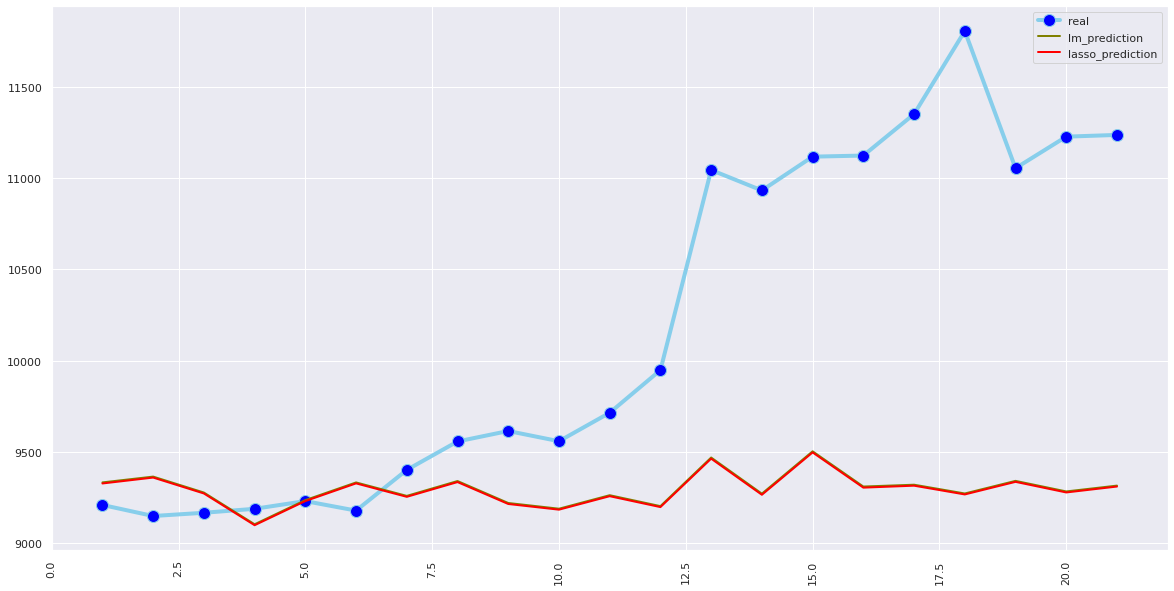

In [153]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_july, marker='', color='olive', linewidth=2)
plt.plot( 'index', 'lasso_prediction', data=merge_july, marker='', color='red', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Support Vector Regression - July

In [154]:
# Import the algorithm package
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [155]:
y_train_july = pd.DataFrame(y_train_july)

In [156]:
#3 Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_train_july)
y = sc_y.fit_transform(y_train_july)

In [157]:
y = y[:, 0]

In [158]:
# Load the SVR and fit
#svr = SVR(kernel='poly')
svr_regressor = SVR(kernel = 'rbf')
SVR_reg = svr_regressor.fit(X, y)

In [159]:
# Predict the model on the x_test data
x_test_july = sc_X.fit_transform(x_test_july)

y_pred_july_svr = SVR_reg.predict(x_test_july)
y_pred_july_svr = sc_y.inverse_transform(y_pred_july_svr) 


y_pred_july_svr = pd.DataFrame(y_pred_july_svr)
y_pred_july_svr['index'] = range(1,22)
y_pred_july_svr

,0,index
0,10747.442865,1
1,11158.926178,2
2,8049.849608,3
3,5139.892306,4
4,7189.358841,5
5,8245.571811,6
6,8076.290785,7
7,9575.287305,8
8,6849.292054,9
9,6763.644911,10


In [162]:
# merge the prediction and actual data frames
merge_july = merge_july.merge(y_pred_july_svr, on='index', how='left')

In [175]:
# Merge Donald's July predictions into the merge_july data frame
PredictionVSactual_july.columns = ['real', 'random_forest']

merge_july = merge_july.merge(PredictionVSactual_july, on='real', how='left')

merge_july

,lm_prediction,index,real,lasso_prediction,svr_prediction,stuff up,random_forest
0,9333.603618,1,9210.100000,9327.732483,10747.442865,10747.442865,9143.888356
1,9365.369742,2,9149.600000,9360.055012,11158.926178,11158.926178,8907.465975
2,9278.120538,3,9167.328612,9272.993942,8049.849608,8049.849608,8783.675973
3,9104.480770,4,9189.100000,9099.215872,5139.892306,5139.892306,8658.144971
4,9236.806446,5,9231.200000,9231.376318,7189.358841,7189.358841,8686.226125
5,9333.435375,6,9179.200000,9328.203801,8245.571811,8245.571811,8746.583132
6,9259.810312,7,9402.000000,9254.669413,8076.290785,8076.290785,8721.904008
7,9341.068832,8,9557.700000,9335.365426,9575.287305,9575.287305,8795.015375
8,9220.868092,9,9615.000000,9215.435484,6849.292054,6849.292054,8722.178922
9,9189.588845,10,9559.100000,9184.387563,6763.644911,6763.644911,8664.883283


In [176]:
merge_july['Average'] = (merge_july['lm_prediction'] + merge_july['random_forest'])/2
merge_july

,lm_prediction,index,real,lasso_prediction,svr_prediction,stuff up,random_forest,Average
0,9333.603618,1,9210.100000,9327.732483,10747.442865,10747.442865,9143.888356,9238.745987
1,9365.369742,2,9149.600000,9360.055012,11158.926178,11158.926178,8907.465975,9136.417859
2,9278.120538,3,9167.328612,9272.993942,8049.849608,8049.849608,8783.675973,9030.898256
3,9104.480770,4,9189.100000,9099.215872,5139.892306,5139.892306,8658.144971,8881.312870
4,9236.806446,5,9231.200000,9231.376318,7189.358841,7189.358841,8686.226125,8961.516285
5,9333.435375,6,9179.200000,9328.203801,8245.571811,8245.571811,8746.583132,9040.009253
6,9259.810312,7,9402.000000,9254.669413,8076.290785,8076.290785,8721.904008,8990.857160
7,9341.068832,8,9557.700000,9335.365426,9575.287305,9575.287305,8795.015375,9068.042104
8,9220.868092,9,9615.000000,9215.435484,6849.292054,6849.292054,8722.178922,8971.523507
9,9189.588845,10,9559.100000,9184.387563,6763.644911,6763.644911,8664.883283,8927.236064


In [164]:
merge_july.columns = ['lm_prediction', 'index', 'real', 'lasso_prediction', 'svr_prediction', 'stuff up']

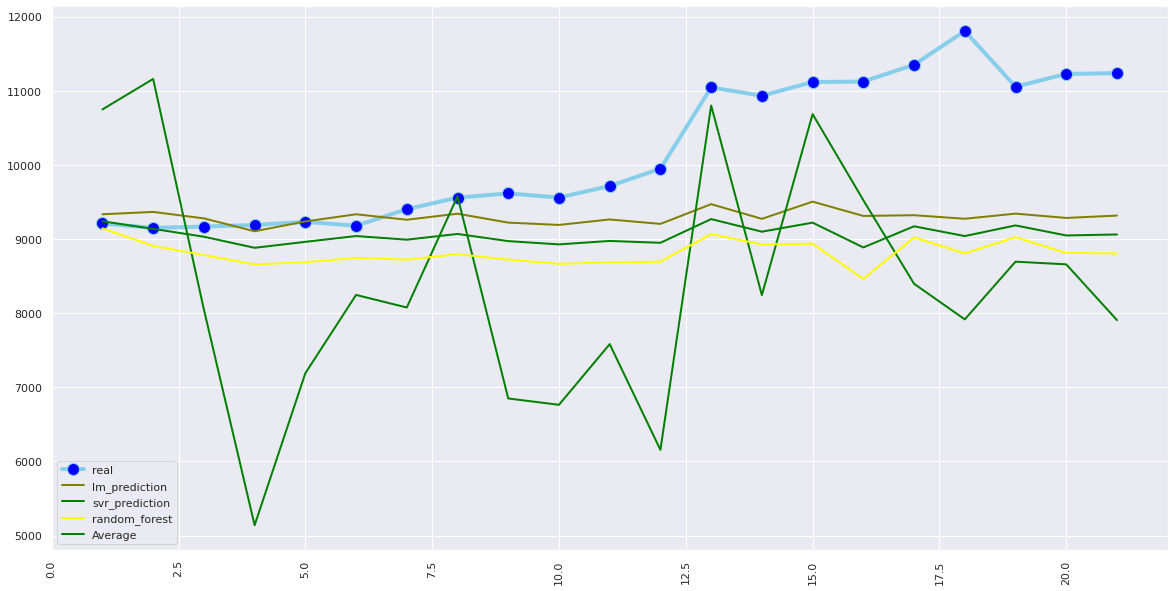

In [182]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_july, marker='', color='olive', linewidth=2)
#plt.plot( 'index', 'lasso_prediction', data=merge_july, marker='', color='red', linewidth=2)
plt.plot( 'index', 'svr_prediction', data=merge_july, marker='', color='green', linewidth=2)
plt.plot( 'index', 'random_forest', data=merge_july, marker='', color='yellow', linewidth=2)
plt.plot( 'index', 'Average', data=merge_july, marker='', color='green', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Vanilla Neural Network - May

In [206]:
%tensorflow_version 2.x

In [207]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [208]:
# Standardise the two data sets as a neural network requires standardised data

scaled_X_train = scale(x_train_may)
scaled_X_test = scale(x_test_may)

In [209]:
# Set the seed for the modelling exercises in order to get reproducible results

tf.random.set_seed(168)
np.random.seed(168)

In [210]:
from tensorflow.keras.layers import Dense, Dropout

In [211]:
# Create a sequential model 

model = tf.keras.Sequential()

In [212]:
# create the architecture for the neural network

layer1 = Dense(128, activation='relu', input_shape=[9])

layer2 = Dense(128, activation='relu')

layer3 = Dense(128, activation='relu')

top_layer = Dense(1)

In [213]:
# Add the layers into the model

model.add(layer1)
model.add(Dropout(0.5))
model.add(layer2)
model.add(Dropout(0.5))
model.add(layer3)
model.add(Dropout(0.5))
model.add(top_layer)

In [214]:
# Specify the optimizer to be used during the back propgation
optimizer = tf.keras.optimizers.Adam(0.0001)

In [215]:
# Compile the model architecture

model.compile(loss='mean_squared_error', optimizer=optimizer)

In [216]:
# Print a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1280      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [217]:
history = model.fit(scaled_X_train, y_train_may, epochs=250, validation_split = 0.3)

Epoch 1/250
24/24 [==============================] - 0s 7ms/step - loss: 53870608.0000 - val_loss: 79041032.0000
Epoch 2/250
24/24 [==============================] - 0s 3ms/step - loss: 53867348.0000 - val_loss: 79038296.0000
Epoch 3/250
24/24 [==============================] - 0s 3ms/step - loss: 53862568.0000 - val_loss: 79034944.0000
Epoch 4/250
24/24 [==============================] - 0s 3ms/step - loss: 53857872.0000 - val_loss: 79030432.0000
Epoch 5/250
24/24 [==============================] - 0s 3ms/step - loss: 53851308.0000 - val_loss: 79024296.0000
Epoch 6/250
24/24 [==============================] - 0s 3ms/step - loss: 53842140.0000 - val_loss: 79015872.0000
Epoch 7/250
24/24 [==============================] - 0s 3ms/step - loss: 53830312.0000 - val_loss: 79004064.0000
Epoch 8/250
24/24 [==============================] - 0s 3ms/step - loss: 53812892.0000 - val_loss: 78987464.0000
Epoch 9/250
24/24 [==============================] - 0s 3ms/step - loss: 53786440.0000 - val_los

In [218]:
# Make a prediction
preds = model.predict(scaled_X_test)

In [227]:
preds = pd.DataFrame(preds)

preds['index'] = range(1,22)

preds.columns = ['NN', 'index']

In [226]:
y_test_may = pd.DataFrame(y_test_may)

y_test_may['index'] = range(1,22)

y_test_may.columns = ['real', 'index']

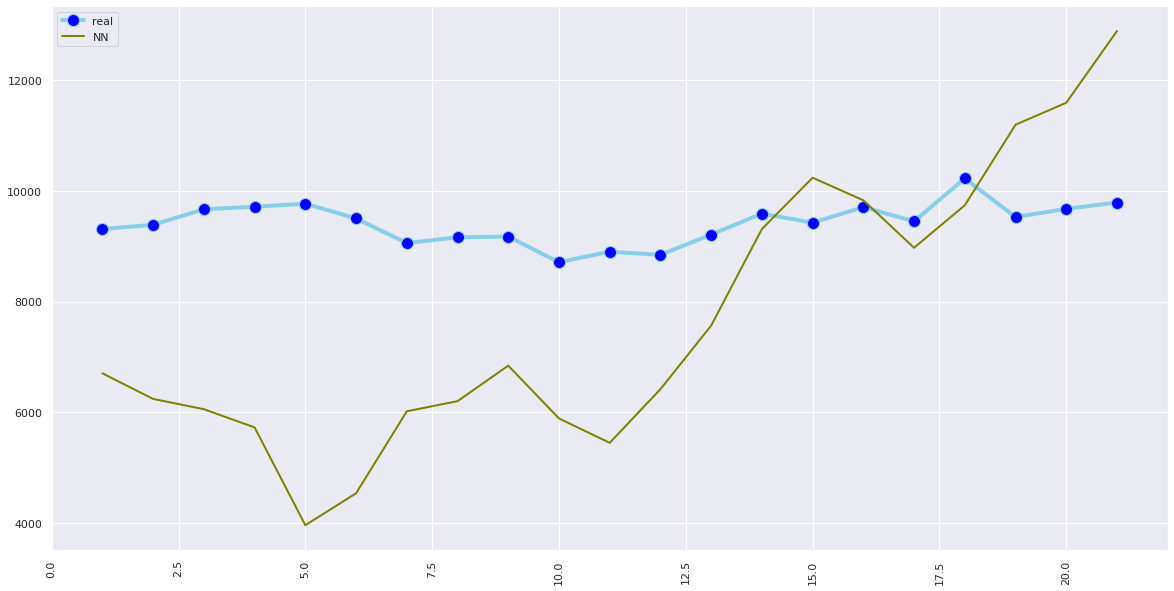

In [228]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt

plt.plot( 'index', 'real', data=y_test_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)

plt.plot( 'index', 'NN', data=preds, marker='', color='olive', linewidth=2)

plt.xticks(rotation='vertical')

plt.legend()

# Vanilla Neural Network - July



In [229]:
%tensorflow_version 2.x

In [230]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [231]:
# Standardise the two data sets as a neural network requires standardised data

scaled_X_train = scale(x_train_july)
scaled_X_test = scale(x_test_july)
scaled_y_train = scale(y_train_july)
scaled_y_test = scale(y_test_july)

In [232]:
# Set the seed for the modelling exercises in order to get reproducible results

tf.random.set_seed(168)
np.random.seed(168)

In [233]:
from tensorflow.keras.layers import Dense, Dropout

In [234]:
# Create a sequential model 

model = tf.keras.Sequential()

In [235]:
# create the architecture for the neural network

layer1 = Dense(512, activation='relu', input_shape=[9])

layer2 = Dense(512, activation='relu')

layer3 = Dense(512, activation='relu')

layer4 = Dense(512, activation='relu')

#layer5 = Dense(512, activation='relu')

top_layer = Dense(1)

In [236]:
# Add the layers into the model

model.add(layer1)
model.add(Dropout(0.5))
model.add(layer2)
model.add(Dropout(0.5))
model.add(layer3)
model.add(Dropout(0.5))
model.add(layer4)
model.add(Dropout(0.5))
#model.add(layer5)
#model.add(Dropout(0.5))
model.add(top_layer)

In [237]:
# Specify the optimizer to be used during the back propgation
optimizer = tf.keras.optimizers.Adam(0.0001)

In [238]:
# Compile the model architecture

model.compile(loss='mean_squared_error', optimizer=optimizer)

In [239]:
# Print a summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               5120      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)              

In [240]:
history = model.fit(scaled_X_train, y_train_july, epochs=200, validation_split = 0.2)

Epoch 1/200
29/29 [==============================] - 0s 6ms/step - loss: 60731548.0000 - val_loss: 71324696.0000
Epoch 2/200
29/29 [==============================] - 0s 3ms/step - loss: 60678316.0000 - val_loss: 71241608.0000
Epoch 3/200
29/29 [==============================] - 0s 3ms/step - loss: 60366784.0000 - val_loss: 70661312.0000
Epoch 4/200
29/29 [==============================] - 0s 3ms/step - loss: 58723272.0000 - val_loss: 67753992.0000
Epoch 5/200
29/29 [==============================] - 0s 3ms/step - loss: 52146920.0000 - val_loss: 58209708.0000
Epoch 6/200
29/29 [==============================] - 0s 3ms/step - loss: 36866908.0000 - val_loss: 38066696.0000
Epoch 7/200
29/29 [==============================] - 0s 3ms/step - loss: 22381978.0000 - val_loss: 17577212.0000
Epoch 8/200
29/29 [==============================] - 0s 3ms/step - loss: 17391886.0000 - val_loss: 8857091.0000
Epoch 9/200
29/29 [==============================] - 0s 3ms/step - loss: 14367886.0000 - val_loss

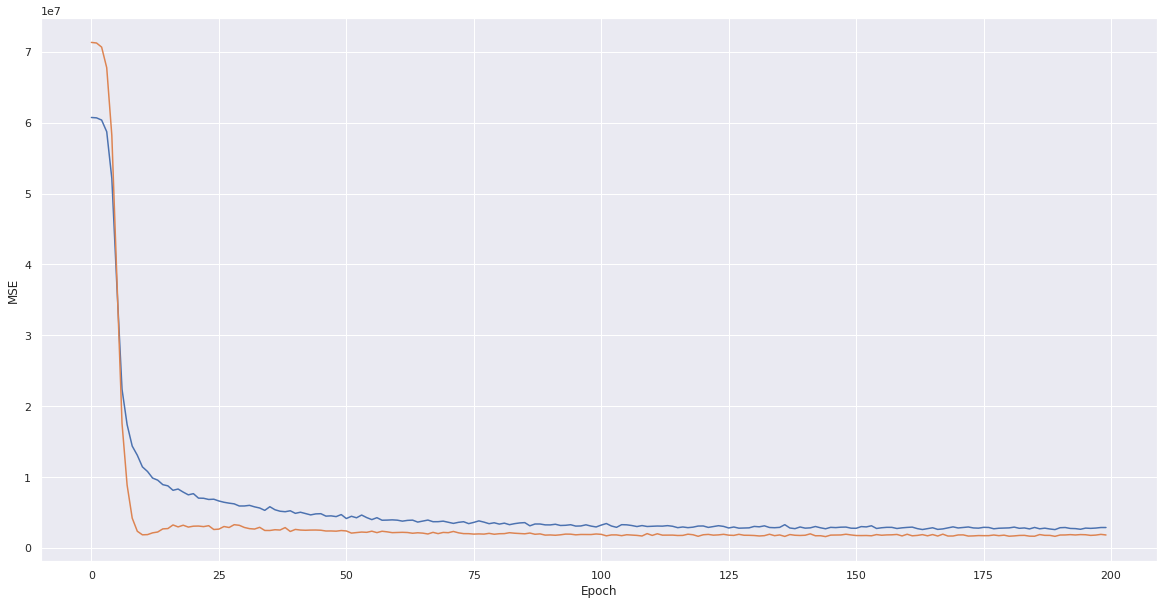

In [241]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='MSE training')
plt.plot(history.history['val_loss'], label='MSE validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

In [242]:
# Make a prediction
preds = model.predict(scaled_X_test)

In [246]:
preds = pd.DataFrame(preds)

preds['index'] = range(1,22)

preds.columns = ['NN', 'index']

preds

,NN,index
0,12657.651367,1
1,10281.222656,2
2,7702.377930,3
3,3695.152344,4
4,5591.658691,5
5,7909.886719,6
6,6994.599121,7
7,9158.746094,8
8,6824.205566,9
9,5087.461914,10


In [247]:
y_test_july = pd.DataFrame(y_test_july)

y_test_july['index'] = range(1,22)

y_test_july.columns = ['real', 'index']

y_test_july

,real,index
1133,9210.100000,1
1134,9149.600000,2
1135,9167.328612,3
1136,9189.100000,4
1137,9231.200000,5
1138,9179.200000,6
1139,9402.000000,7
1140,9557.700000,8
1141,9615.000000,9
1142,9559.100000,10


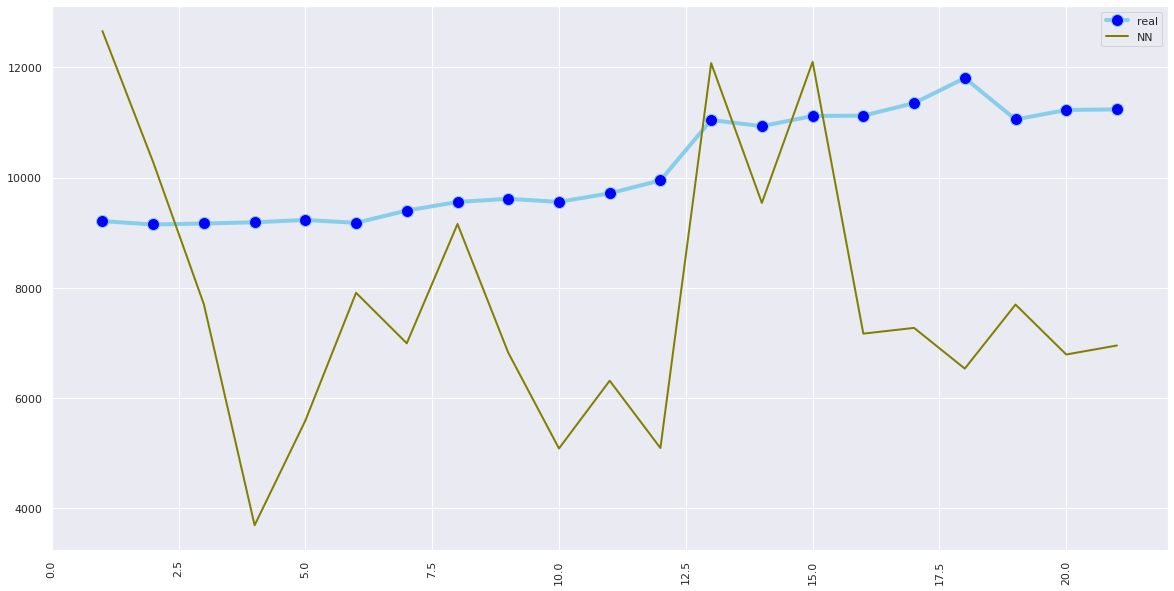

In [248]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt

plt.plot( 'index', 'real', data=y_test_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)

plt.plot( 'index', 'NN', data=preds, marker='', color='olive', linewidth=2)

plt.xticks(rotation='vertical')

plt.legend()